In [3]:
import pandas as pd
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [4]:
cols = ['Lo 20', 'Hi 20']
returns = me_m[cols]
returns.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [5]:
returns = returns/100

In [6]:
returns.plot()

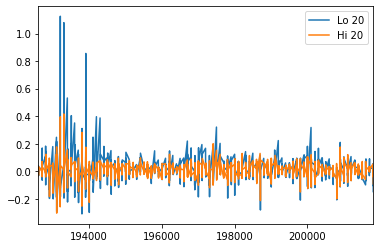

In [7]:
returns.plot()

In [9]:
import numpy as np
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [10]:
# We can now compute the annualized returns as follows:

n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [20]:
annualized_return = (return_per_month + 1)**12-1

In [21]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

## Timeseries - forcing the index to be a datetime

We asked Pandas to `parse_dates` in `read_csv()`. Let's check if it was able to do so with the index:

In [26]:
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [27]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [28]:
returns["2008"]

,Lo 20,Hi 20
2008-01-01,-0.0502,-0.0531
2008-02-01,-0.0270,-0.0278
2008-03-01,-0.0356,-0.0200
2008-04-01,0.0070,0.0560
2008-05-01,0.0289,0.0232
2008-06-01,-0.0891,-0.0964
2008-07-01,0.0074,-0.0219
2008-08-01,0.0172,0.0035
2008-09-01,-0.1163,-0.1238
2008-10-01,-0.2080,-0.2006


This looks good except that we know this is monthly data, and it's showing up with an index that is date stamped. We can fix this using the `to_period` method. We'll see several more examples of Pandas support for timeseries during the course.

In [29]:
returns.index = returns.index.to_period('M')
returns.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [30]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
Lo 20    1110 non-null float64
Hi 20    1110 non-null float64
dtypes: float64(2)
memory usage: 26.0 KB


In [31]:
returns.describe()

,Lo 20,Hi 20
count,1110.000000,1110.000000
mean,0.015904,0.009434
std,0.097197,0.056325
min,-0.309900,-0.304000
25%,-0.026950,-0.019175
50%,0.011900,0.012300
75%,0.048300,0.038375
max,1.126000,0.416300


In [32]:
rets = returns["1999":"2015"]

In [33]:
rets


,Lo 20,Hi 20
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
1999-06,0.0345,0.0280
1999-07,0.0274,-0.0374
1999-08,-0.0343,-0.0227
1999-09,-0.0234,-0.0398
1999-10,-0.0151,0.0590


In [37]:
# We can now compute the annualized returns as follows:

n_months = rets.shape[0]
return_per_month = (rets+1).prod()**(1/n_months) - 1
return_per_month

Lo 20    0.009069
Hi 20    0.005094
dtype: float64

In [38]:
annualized_return = (return_per_month + 1)**12-1

In [40]:
annualized_return = (rets+1).prod()**(12/n_months) - 1
annualized_return

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

In [41]:
annualized_vol = rets.std()*np.sqrt(12)
annualized_vol

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

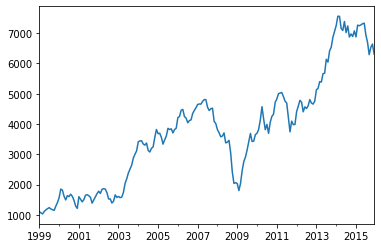

In [42]:
wealth_index = 1000*(1+rets["Lo 20"]).cumprod()
wealth_index.plot()

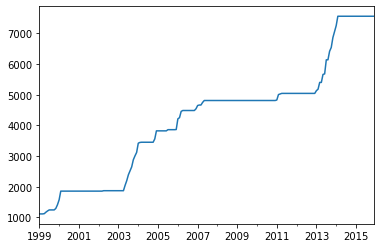

In [43]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

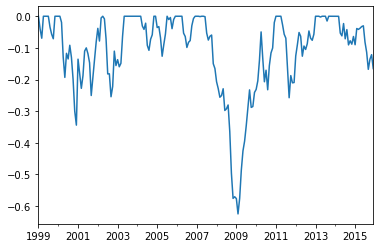

In [44]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [47]:
drawdown.min()

-0.6248092431236988

# Creating a Drawdown Function

Redoing this analysis for SmallCap would be tedious, since we would need to re-enter all these commands at the prompt. Instead, let's create our first function that will form the first tool in our financial toolkit.

The function will take as input, a timeseries of returns, and return a timeseries as a DataFrame that contains the wealth index, the previous peaks and the drawdowns as a percent.

In [48]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

drawdown(rets["Lo 20"]).head()

,Wealth,Previous Peak,Drawdown
1999-01,1111.400000,1111.400000,0.000000
1999-02,1067.055140,1111.400000,-0.039900
1999-03,1034.189842,1111.400000,-0.069471
1999-04,1119.407085,1119.407085,0.000000
1999-05,1168.101293,1168.101293,0.000000


In [52]:
drawdown(rets["Lo 20"]).min()

Wealth           1034.189842
Previous Peak    1111.400000
Drawdown           -0.624809
dtype: float64

In [54]:
drawdown(rets["Lo 20"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [55]:
drawdown(rets["Hi 20"]).head()

,Wealth,Previous Peak,Drawdown
1999-01,1015.300000,1015.300000,0.0000
1999-02,997.836840,1015.300000,-0.0172
1999-03,1034.557236,1034.557236,0.0000
1999-04,1104.803672,1104.803672,0.0000
1999-05,1099.500614,1104.803672,-0.0048


In [56]:
drawdown(rets["Hi 20"]).min()

Wealth            721.706638
Previous Peak    1015.300000
Drawdown           -0.552735
dtype: float64

In [57]:
drawdown(rets["Hi 20"])["Drawdown"].idxmin()

Period('2009-02', 'M')

# Downside Measures: SemiDeviation, VaR and CVaR

We're going to look at a few measures of downside risk. We've already seen how to compute drawdowns, but we're going to look at 3 popular measures, and we are going to develop code to compute these and add them to our toolbox.

The first measure is the simplest, which is the semideviation, which is nothing more than the volatility of the subset of returns that are negative.

The code is very simple:

```python
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)
```


In [58]:
import pandas as pd
import edhec_risk_kit_106 as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [59]:
hfi = erk.get_hfi_returns()

In [60]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)


In [71]:
erk.semideviation(hfi["2009":"2018"])

Convertible Arbitrage     0.006681
CTA Global                0.010996
Distressed Securities     0.009498
Emerging Markets          0.015276
Equity Market Neutral     0.005186
Event Driven              0.010135
Fixed Income Arbitrage    0.003321
Global Macro              0.005075
Long/Short Equity         0.012139
Merger Arbitrage          0.003611
Relative Value            0.005711
Short Selling             0.021240
Funds Of Funds            0.007948
dtype: float64

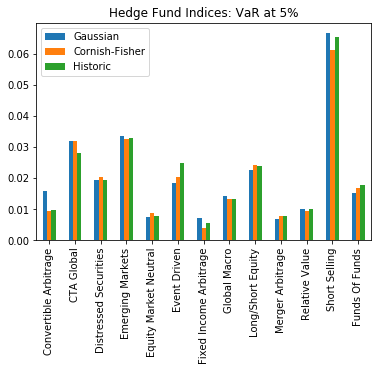

In [73]:
var_table = [erk.var_gaussian(hfi["2009":"2018"]), 
             erk.var_gaussian(hfi["2009":"2018"], modified=True), 
             erk.var_historic(hfi["2009":"2018"])]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

In [76]:
erk.kurtosis(hfi["2000":"2018"]).sort_values(ascending=False)

Fixed Income Arbitrage    33.378729
Convertible Arbitrage     23.001449
Equity Market Neutral     20.329621
Relative Value            12.731096
Funds Of Funds             7.584725
Distressed Securities      6.231720
Emerging Markets           5.941289
Event Driven               5.543444
Merger Arbitrage           4.520785
Long/Short Equity          4.472589
Short Selling              4.352758
Global Macro               3.653278
CTA Global                 2.845022
dtype: float64

In [ ]:
erk.skewness(hfi["2009":"2018"]).sort_values(ascending=False)